## Bibliotecas e variáveis 

In [19]:
import pandas as pd 
import numpy as np

path = '/home/nascimento/Documents/USP/Monografia/Data/Raw'

save = [path + '/ipca',path + '/pre']

## Funções

In [20]:


def real(dt):
    url = r'https://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/TxRef1.asp?Data=' + dt.strftime('%d/%m/%Y') + '&slcTaxa=DIC'
    html = pd.read_html(url) # read B3 data
    data = None 

    if 'Não há dados para a data fornecida!' not in list(html[1].iloc[0]):
        data_list = [float(taxa) for taxa in list(html[1][0])[0].replace('Dias Corridos DI x IPCA 252(2) ', '').replace('Dias Corridos 252(2) ', '').replace(',', '.').split(' ')] # get data and cleaning it 
        n = 0 
        data = []

        while n + 2 < len(data_list):
            data.append(np.array(data_list[n: n + 2]).astype('float64')) # appending data (?)
            n += 2
        
        data = pd.DataFrame(data, columns = ['TenorsDays', 'bd252']) # data cleaning and formatting
        data['Date'] = [dt for n in range(len(data))]

    return data 


In [43]:
def nominal(dt):
    url = r'https://www2.bmf.com.br/pages/portal/bmfbovespa/boletim1/TxRef1.asp?Data=' + dt.strftime('%d/%m/%Y') + '&slcTaxa=PRE'
    html = pd.read_html(url) # read B3 data
    data = None 

    if 'Não há dados para a data fornecida!' not in list(html[1].iloc[0]):
        data_list = list(html[1][0])[0].replace('Dias Corridos DI x pré 252(2)(4) 360(1) ', '').replace('Dias Corridos PRExDI 252(2)(4) 360(1) ', '').replace(',', '.').split(' ') # get data and cleaning it 
        n = 0 
        data = []

        while n + 3 < len(data_list):
            data.append(np.array(data_list[n: n + 3]).astype('float64')) # appending data (?)
            n += 3
        
        data = pd.DataFrame(data, columns = ['TenorsDays', 'bd252', 'act360']) # data cleaning and formatting
        data['Date'] = [dt for n in range(len(data))]

    return data 


## Request and format data

In [22]:
date_list = pd.date_range(start = '2005-01-01', end ='2024-04-19') # data range

df_real = []

for dt in date_list: # request data and create data frame 
    
    print(dt)
    
    real_rate = real(dt) # request data based on date (dt)
    
    if(type(real_rate) != type(None)):

        real_rate = pd.pivot_table(real_rate, values = 'bd252', index = 'Date', columns = ['TenorsDays']).sort_values(by = 'Date') # format new data with pivot table
        df_real = real_rate if not len(df_real) else pd.concat([df_real, real_rate]) # concat new data to the data frame 
        
df_real.columns = df_real.columns.astype('float64') # format columns 
df_real.index = df_real.index.astype('datetime64[ns]') # format index (rows)

df_real = df_real.reindex(columns=sorted(list(df_real.columns))) # sort columns by tenure 

2005-01-01 00:00:00
2005-01-02 00:00:00
2005-01-03 00:00:00
2005-01-04 00:00:00
2005-01-05 00:00:00
2005-01-06 00:00:00
2005-01-07 00:00:00
2005-01-08 00:00:00
2005-01-09 00:00:00
2005-01-10 00:00:00
2005-01-11 00:00:00
2005-01-12 00:00:00
2005-01-13 00:00:00
2005-01-14 00:00:00
2005-01-15 00:00:00
2005-01-16 00:00:00
2005-01-17 00:00:00
2005-01-18 00:00:00
2005-01-19 00:00:00
2005-01-20 00:00:00
2005-01-21 00:00:00
2005-01-22 00:00:00
2005-01-23 00:00:00
2005-01-24 00:00:00
2005-01-25 00:00:00
2005-01-26 00:00:00
2005-01-27 00:00:00
2005-01-28 00:00:00
2005-01-29 00:00:00
2005-01-30 00:00:00
2005-01-31 00:00:00
2005-02-01 00:00:00
2005-02-02 00:00:00
2005-02-03 00:00:00
2005-02-04 00:00:00
2005-02-05 00:00:00
2005-02-06 00:00:00
2005-02-07 00:00:00
2005-02-08 00:00:00
2005-02-09 00:00:00
2005-02-10 00:00:00
2005-02-11 00:00:00
2005-02-12 00:00:00
2005-02-13 00:00:00
2005-02-14 00:00:00
2005-02-15 00:00:00
2005-02-16 00:00:00
2005-02-17 00:00:00
2005-02-18 00:00:00
2005-02-19 00:00:00


In [44]:
date_list = pd.date_range(start = '2005-01-01', end ='2024-04-19') # data range

df_nominal = []

for dt in date_list: # request data and create data frame 
    
    print(dt)
    
    nominal_rate = nominal(dt) # request data based on date (dt)
    
    if(type(nominal_rate) != type(None)):

        nominal_rate = pd.pivot_table(nominal_rate, values = 'bd252', index = 'Date', columns = ['TenorsDays']).sort_values(by = 'Date') # format new data with pivot table
        df_nominal = nominal_rate if not len(df_nominal) else pd.concat([df_nominal, nominal_rate]) # concat new data to the data frame 
        
df_nominal.columns = df_nominal.columns.astype('float64') # format columns 
df_nominal.index = df_nominal.index.astype('datetime64[ns]') # format index (rows)

df_nominal = df_nominal.reindex(columns=sorted(list(df_nominal.columns))) # sort columns by tenure 

2005-01-01 00:00:00
2005-01-02 00:00:00
2005-01-03 00:00:00
2005-01-04 00:00:00
2005-01-05 00:00:00
2005-01-06 00:00:00
2005-01-07 00:00:00
2005-01-08 00:00:00
2005-01-09 00:00:00
2005-01-10 00:00:00
2005-01-11 00:00:00
2005-01-12 00:00:00
2005-01-13 00:00:00
2005-01-14 00:00:00
2005-01-15 00:00:00
2005-01-16 00:00:00
2005-01-17 00:00:00
2005-01-18 00:00:00
2005-01-19 00:00:00
2005-01-20 00:00:00
2005-01-21 00:00:00
2005-01-22 00:00:00
2005-01-23 00:00:00
2005-01-24 00:00:00
2005-01-25 00:00:00
2005-01-26 00:00:00
2005-01-27 00:00:00
2005-01-28 00:00:00
2005-01-29 00:00:00
2005-01-30 00:00:00
2005-01-31 00:00:00
2005-02-01 00:00:00
2005-02-02 00:00:00
2005-02-03 00:00:00
2005-02-04 00:00:00
2005-02-05 00:00:00
2005-02-06 00:00:00
2005-02-07 00:00:00
2005-02-08 00:00:00
2005-02-09 00:00:00
2005-02-10 00:00:00
2005-02-11 00:00:00
2005-02-12 00:00:00
2005-02-13 00:00:00
2005-02-14 00:00:00
2005-02-15 00:00:00
2005-02-16 00:00:00
2005-02-17 00:00:00
2005-02-18 00:00:00
2005-02-19 00:00:00


## Save data

In [23]:
df_real.to_csv(save[0] + '.csv')

In [45]:
df_real.to_csv(save[1] + '.csv')

## Plot

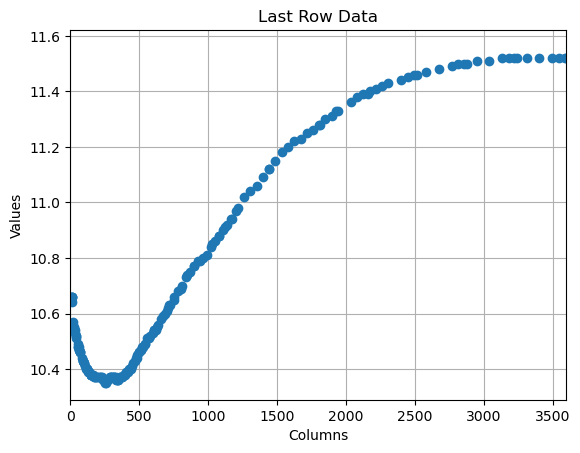

In [46]:
last_row = df_nominal.iloc[-1]
last_row_transposed = last_row.to_frame().T

# Plot the last row as a line plot with column names on X-axis
plt.plot(last_row_transposed.columns.dropna(), last_row_transposed.values.flatten(), marker='o',linestyle='-')
plt.title('Last Row Data')
plt.xlabel('Columns')
plt.xlim(0,3600)

plt.ylabel('Values')
plt.grid(True)  # Add grid lines for better readability
plt.show()


# SAla C 120 C, dia 26, 19h 



construir di pre

codigo p att

codigo p interpolar


Comparar curva dos 5 dias uteis com a d anbima

Ler sobre swap

comparar metodologias